# <font color='green'>Endangered U.S. Names of Our Century</font>

### We might be the last generation with common names from the 1900s!

##### Data obtained from the Social Security Administration's Baby Names from Social Security Card Applications - National Data (https://www.ssa.gov/data/)

In [1]:
#%matplotlib inline
import matplotlib as mpl # for .StrMethodFormatter to add ',' to tick labels
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # for .DateFormatter to modify tick date format
import pandas as pd
import numpy as np

In [2]:
# read in file and format
df_Names = pd.read_csv('5year.csv') 
df_Names['Year'] = pd.to_datetime(df_Names['Year'], format = "%Y") 
df_Names.set_index('Year', inplace = True)

### Interactive cell to provide the name and gender for the plot:

In [3]:
YourName = input("Enter the first name you are interested in? ")
YourGender = input("Enter if male or female (M or F)? ")

cond_name = df_Names["Name"] == YourName
cond_sex = df_Names["Sex"] == YourGender
df_Names[cond_name & cond_sex]['Records']
MaxRec = max(df_Names[cond_name & cond_sex]['Records'])
cond_MaxRec = df_Names['Records'] == max(df_Names[cond_name & cond_sex]['Records'])

Enter the first name you are interested in? Douglas
Enter if male or female (M or F)? M


In [5]:
df_Names[cond_name & cond_sex]['Records']

Year
1880-01-01       29
1885-01-01       30
1890-01-01       38
1895-01-01       61
1900-01-01      107
1905-01-01       85
1910-01-01      169
1915-01-01      734
1920-01-01     1657
1925-01-01     1677
1930-01-01     2167
1935-01-01     2529
1940-01-01     3732
1945-01-01     7393
1950-01-01    12266
1955-01-01    15311
1960-01-01    15146
1965-01-01    12790
1970-01-01    11402
1975-01-01     5354
1980-01-01     5180
1985-01-01     4024
1990-01-01     3545
1995-01-01     1946
2000-01-01     1173
2005-01-01      821
2010-01-01      534
2015-01-01      435
2019-01-01      372
Name: Records, dtype: int64

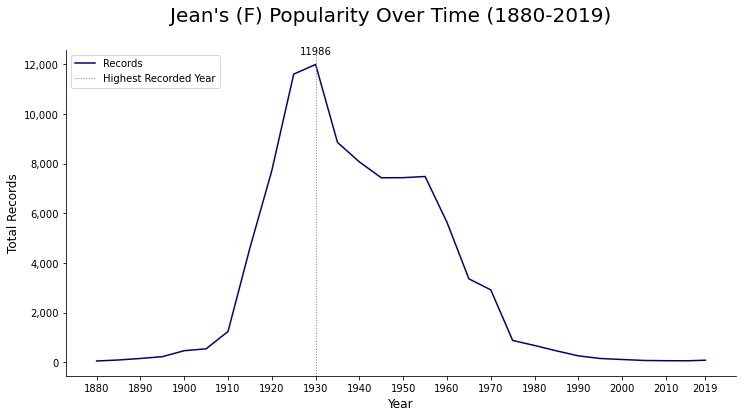

In [14]:
fig1, ax1 = plt.subplots()
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
fig1.set_size_inches(12, 6)
fig1.suptitle(f'{YourName}\'s ({YourGender}) Popularity Over Time (1880-2019)', c = 'k', fontsize = '20')

ax1.plot(df_Names[cond_name & cond_sex].index, df_Names[cond_name & cond_sex]['Records'], label = 'Records', c = 'navy')

ax1.xaxis.set_label_text('Year', fontsize = '12')
ax1.yaxis.set_label_text('Total Records', fontsize = '12')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.set_xticks(df_Names[cond_name & cond_sex].index[::2])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax1.axvline(x = df_Names[cond_MaxRec].index, label = 'Highest Recorded Year', linewidth = 1, linestyle = 'dotted', c = 'gray')
plt.annotate(f'{MaxRec}', 
             (df_Names[cond_MaxRec].index, MaxRec), # coordinates to position the label
             textcoords = "offset points",          # how to position the text
             xytext = (0, 10),                      # distance from text to point
             ha = 'center')

ax1.legend(loc = 2)